In [47]:
import pandas as pd
import numpy
import seaborn as sns

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

from collections import namedtuple

In [2]:
df = pd.read_pickle('bikeshare.pkl')

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
X,y = df[['Hour','Temperature(°C)']], df['Rented Bike Count']

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [37]:
lr = LinearRegression().fit(X,y)
lr_metrics = []

In [40]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
lr_cv_mean, lr_cv_standard_dev = np.mean(cross_val_score(lr, X, y, cv=kf, scoring='r2')), np.std(cross_val_score(lr, X, y, cv=kf, scoring='r2'))

In [41]:
predictions = lr.predict(X)
actual = y

In [31]:
explained_variance_score(actual,predictions)

0.41048590579645716

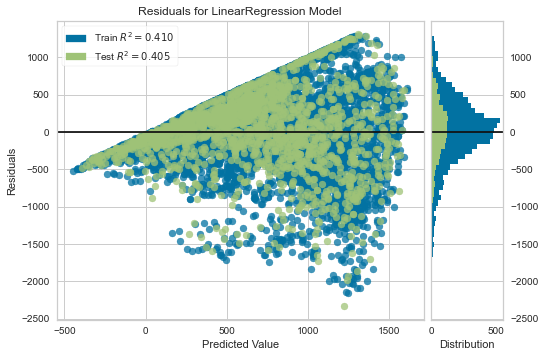

In [33]:
visualizer = ResidualsPlot(lr)
visualizer.fit(X, y)
visualizer.score(X_test,y_test)
visualizer.show()

In [44]:
lr_metrics = [
    lr_cv_mean, 
    lr_cv_standard_dev,
    explained_variance_score(actual,predictions),
    median_absolute_error(actual,predictions),
    max_error(actual, predictions)
]

In [45]:
lr_metrics

[0.40836875336644896,
 0.013818427791370528,
 0.41048590579645716,
 272.3892577333069,
 2160.268363790367]

#### Observations

An off-the-shelf model will not get us very far; there's important behavior that's not being captured. The dependent variable in its raw state has a lot of variance, particularly as the volume of rentals increases. My sense is that there are two approaches in the playbook that could prove fruitful. 

The first is to apply a power transform on the target. The model performs most poorly at the extremes. Applying a transformation to the target accomodates the nonlinear relationship between the target and features while remaining within the multiple linear regression framework.

The second is **. Again, the right slope seems to depend on which part of the X axis you are. I believe temperature is the driver here. Customers want the sun to be out, and they want it to be warm. But there is such a thing as too much sun. Once it gets too hot, the strong trajectory turns into a strong downward dip. That tipping point should be where the second piece of the model is triggered.
The second is **. Again, the right slope seems to depend on which part of the X axis you are. I believe temperature is the driver here. Customers want the sun to be out, and they want it to be warm. But there is such a thing as too much sun. Once it gets too hot, the strong trajectory turns into a strong downward dip. That tipping point should be where the second piece of the model is triggered.
The second is **. Again, the right slope seems to depend on which part of the X axis you are. I believe temperature is the driver here. Customers want the sun to be out, and they want it to be warm. But there is such a thing as too much sun. Once it gets too hot, the strong trajectory turns into a strong downward dip. That tipping point should be where the second piece of the model is triggered.
</br>
</br>
</br>

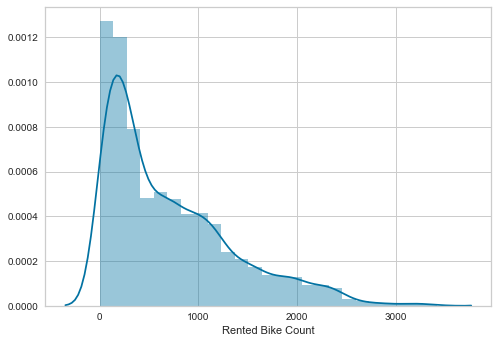

In [48]:
sns.distplot(y, bins=25)